In [4]:
DATA_DIR = '../atari_v1'

In [5]:
import agc.dataset as dataset
import agc.util as util

import numpy as np

from os import path, listdir

import cv2

from IPython.display import display, HTML
from prettytable import PrettyTable

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
dataset = dataset.AtariDataset(DATA_DIR)

In [10]:
#print out games
for g in util.GAMES:
    print(g)

spaceinvaders
qbert
mspacman
pinball
revenge


In [22]:
#get statistics for spaceinvaders

g = 'spaceinvaders'
print('total episodes', dataset.stats[g]['total_replays'])
print('frames',dataset.stats[g]['total_frames'])
print('hours of gameplay',float(dataset.stats[g]['total_frames']//60//60/60))
print('worst score', dataset.stats[g]['min_score'])
print('best score', dataset.stats[g]['max_score'])
print('average score', dataset.stats[g]['avg_score'])



total episodes 423
frames 1766078
hours of gameplay 8.166666666666666
worst score 5
best score 1960
average score 590.8747044917258


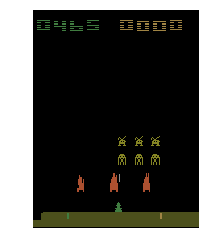

In [42]:
#plot a random frame
f = plt.gcf()
screens_dir = path.join(DATA_DIR, 'screens', g)
sample_traj = path.join(screens_dir, np.random.choice(listdir(screens_dir)))
sample_pic = np.random.choice(listdir(sample_traj))
pic = cv2.imread(path.join(sample_traj, sample_pic))
plt.imshow(cv2.cvtColor(pic, cv2.COLOR_BGR2RGB))
plt.axis('off');

(array([ 57.,  68., 119.,  93.,  30.,  19.,  16.,   9.,   9.,   3.]),
 array([   5. ,  200.5,  396. ,  591.5,  787. ,  982.5, 1178. , 1373.5,
        1569. , 1764.5, 1960. ]),
 <a list of 10 Patch objects>)

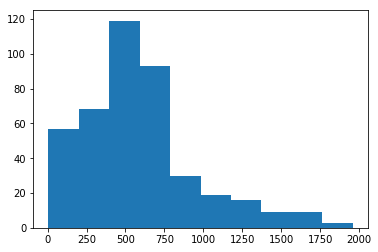

In [49]:
#plot histogram of scores for space invaders
scores = []
for t in dataset.trajectories[g]:
    scores.append(dataset.trajectories[g][t][-1]['score'])
plt.hist(scores)


(array([1.125827e+06, 3.289870e+05, 2.486890e+05, 4.270000e+02,
        4.600000e+01, 7.500000e+01, 3.556800e+04, 2.639300e+04,
        8.000000e+00, 5.800000e+01]),
 array([ 0. ,  1.6,  3.2,  4.8,  6.4,  8. ,  9.6, 11.2, 12.8, 14.4, 16. ]),
 <a list of 10 Patch objects>)

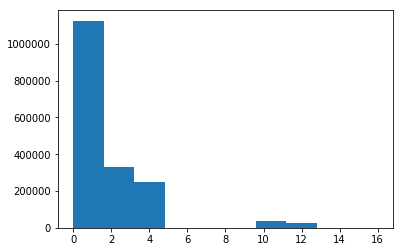

In [54]:
#look at actions, I don't think we'll need them, but just want to see how many buttons are actually pushed and how often it is a no-op
actions = []

for t in dataset.trajectories[g]:
    actions.extend([ct['action'] for ct in dataset.trajectories[g][t]])
plt.hist(actions)

In [94]:
#need to pick out a subset of demonstrations based on desired performance
#first let's sort the demos by performance, we can use the trajectory number to index into the demos so just
#need to sort indices based on 'score'

#Note, I'm also going to try only keeping the full demonstrations that end in terminal
traj_indices = []
traj_scores = []
for t in dataset.trajectories[g]:
    if dataset.trajectories[g][t][-1]['terminal']:
        traj_indices.append(t)
        traj_scores.append(dataset.trajectories[g][t][-1]['score'])
sorted_traj_indices = [x for _, x in sorted(zip(traj_scores, traj_indices), key=lambda pair: pair[0])]
sorted_traj_scores = sorted(traj_scores)

print(sorted_traj_scores)
print(len(sorted_traj_scores))

[10, 15, 40, 40, 95, 95, 100, 125, 135, 195, 200, 200, 210, 215, 220, 230, 235, 235, 255, 255, 260, 260, 260, 260, 270, 270, 275, 285, 285, 290, 290, 290, 300, 315, 315, 320, 320, 325, 330, 330, 335, 340, 340, 345, 350, 350, 350, 355, 355, 360, 360, 360, 360, 365, 365, 365, 370, 370, 370, 385, 385, 390, 390, 390, 395, 405, 410, 420, 440, 445, 445, 445, 450, 450, 455, 460, 460, 460, 460, 470, 480, 485, 485, 485, 485, 485, 490, 490, 490, 490, 495, 505, 510, 510, 510, 510, 510, 515, 515, 515, 515, 515, 515, 515, 520, 520, 520, 520, 525, 530, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 545, 545, 545, 545, 545, 545, 545, 545, 545, 545, 545, 545, 550, 550, 555, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 575, 575, 575, 575, 575, 575, 575, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 

In [102]:
#so how do we want to get demos? how many do we have if we remove duplicates?
seen_scores = set()
non_duplicates = []
for i,s in zip(sorted_traj_indices, sorted_traj_scores):
    if s not in seen_scores:
        seen_scores.add(s)
        non_duplicates.append((i,s))
print("num non duplicates", len(seen_scores))
start = 0
skip = 3
num_demos = 12
demos = non_duplicates[start:num_demos*skip + start:skip]
print(demos)

num non duplicates 97
[(65, 10), (377, 95), (325, 135), (366, 210), (2, 230), (379, 260), (368, 285), (66, 315), (149, 330), (217, 345), (361, 360), (161, 385)]


In [103]:
#How long are these demos?
for i,s in demos:
    print(len(dataset.trajectories[g][i]))

1580
1899
2030
2309
2669
3117
3546
3325
2826
3570
5575
4037


In [121]:
import numpy as np
import os
from collections import deque
import gym
from gym import spaces
import cv2
cv2.ocl.setUseOpenCL(False)
from baselines.common.atari_wrappers import make_atari, wrap_deepmind

In [232]:
#need to grayscale and warp to 84x84
def GrayScaleWarpImage(image):
    """Warp frames to 84x84 as done in the Nature paper and later work."""
    width=84
    height=84 
    frame = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
    frame = cv2.resize(frame, (width, height), interpolation=cv2.INTER_AREA)
    #frame = np.expand_dims(frame, -1)
    return frame

(210, 160, 3)


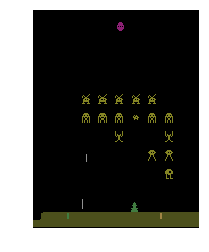

In [162]:
#plot a random frame
f = plt.gcf()
screens_dir = path.join(DATA_DIR, 'screens', g)
sample_traj = path.join(screens_dir, np.random.choice(listdir(screens_dir)))
sample_pic = np.random.choice(listdir(sample_traj))
image_path = path.join(sample_traj, sample_pic)
pic = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(pic, cv2.COLOR_BGR2RGB))
plt.axis('off');
print(pic.shape)


(84, 84)
(84, 84)


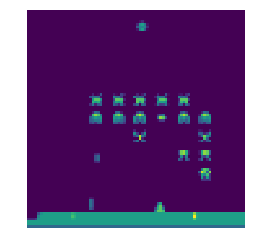

In [172]:
#plot the frame warped
f = plt.gcf()
pic = GrayScaleWarpImage(image_path)
print(pic.shape)
plt.imshow(pic)
plt.axis('off');
print(pic.shape)


In [236]:
def MaxSkipAndWarpFrames(trajectory_dir):
    """take a trajectory file of frames and max over every 3rd and 4th observation"""
    num_frames = len(listdir(trajectory_dir))
    skip=4
    
    sample_pic = np.random.choice(listdir(trajectory_dir))
    image_path = path.join(trajectory_dir, sample_pic)
    pic = cv2.imread(image_path)
    obs_buffer = np.zeros((2,)+pic.shape, dtype=np.uint8)
    max_frames = []
    for i in range(num_frames): 
        #TODO: check that i should max before warping.
        if i % skip == skip - 2: 
            obs = cv2.imread(path.join(trajectory_dir, str(i) + ".png"))
            obs_buffer[0] = obs
        if i % skip == skip - 1: 
            obs = cv2.imread(path.join(trajectory_dir, str(i) + ".png"))
            obs_buffer[1] = obs
            #warp max to 80x80 grayscale
            image = obs_buffer.max(axis=0)
            warped = GrayScaleWarpImage(image)
            max_frames.append(warped)
    return max_frames



In [305]:
def StackFrames(frames):
    import copy
    """stack every four frames to make an observation (84,84,4)"""
    stacked = []
    stacked_obs = np.zeros((84,84,4))
    for i in range(len(frames)):
        if i >= 3:
            stacked_obs[:,:,0] = frames[i-3]
            stacked_obs[:,:,1] = frames[i-2]
            stacked_obs[:,:,2] = frames[i-1]
            stacked_obs[:,:,3] = frames[i]
            stacked.append(np.expand_dims(copy.deepcopy(stacked_obs),0))
    return stacked
        
    

In [306]:
traj_dir = path.join(DATA_DIR, 'screens', g, str(65))
print(traj_dir)
maxed_traj = MaxSkipAndWarpFrames(traj_dir)
stacked_traj = StackFrames(maxed_traj)

../atari_v1/screens/spaceinvaders/65


395
(84, 84)
392
(1, 84, 84, 4)
False


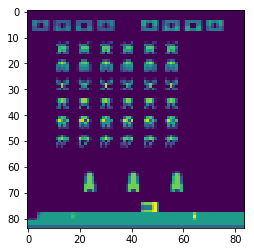

In [308]:
print(len(maxed_traj))
print(maxed_traj[0].shape)

print(len(stacked_traj))
print(stacked_traj[0].shape)
print((stacked_traj[0] == stacked_traj[10]).all())
plt.imshow(stacked_traj[0][0,:,:,0])

395
(84, 84)
392
(1, 84, 84, 4)


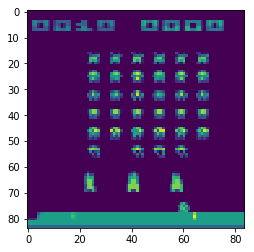

In [309]:
print(len(maxed_traj))
print(maxed_traj[0].shape)

print(len(stacked_traj))
print(stacked_traj[0].shape)
plt.imshow(stacked_traj[-1][0,:,:,0])

In [268]:
#TODO: I need to check how the initial observations work. It seems like the first 25 are just going to be the 3 flashing 

#It would be good to compare my outputs with the outputs from the Atari setup Wonjoon gave me!

#TODO: clean up code and add masking!
#TODO: add normalization